In [ ]:
#Campeonato Quantamental

import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt


tickers = ['AMZN', 'AAPL', 'MMM']
start_date = '2010-01-01'
end_date = '2019-12-31'
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
df = panel_data['Close']
df

Symbols,AMZN,AAPL,MMM
Date,,,
2010-01-04,133.899994,30.572857,83.019997
2010-01-05,134.690002,30.625713,82.500000
2010-01-06,132.250000,30.138571,83.669998
2010-01-07,130.000000,30.082857,83.730003
2010-01-08,133.520004,30.282858,84.320000
...,...,...,...
2019-12-24,1789.209961,284.269989,176.679993
2019-12-26,1868.770020,289.910004,176.589996
2019-12-27,1869.800049,289.799988,177.259995


In [ ]:
#calculo indicador
def bollinger_backtest(frame):
    tickers = frame.columns.values.tolist()
    for t in tickers:
        frame[t + '_sma200'] = frame.rolling(200).mean()[t]
        frame[t + '_bsuperior'] = frame[t + '_sma200'] + 2*(frame.rolling(200).std())[t]
        frame[t + '_binferior'] = frame[t + '_sma200'] - 2*(frame.rolling(200).std())[t]
    return frame

df = bollinger_backtest(df)
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Symbols,AMZN,AAPL,MMM,AMZN_sma200,AMZN_bsuperior,AMZN_binferior,AAPL_sma200,AAPL_bsuperior,AAPL_binferior,MMM_sma200,MMM_bsuperior,MMM_binferior
Date,,,,,,,,,,,,
2010-01-04,133.899994,30.572857,83.019997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,134.690002,30.625713,82.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,132.250000,30.138571,83.669998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,130.000000,30.082857,83.730003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,133.520004,30.282858,84.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1789.209961,284.269989,176.679993,1823.850699,1976.538889,1671.162509,217.04605,273.842593,160.249507,175.05370,209.186191,140.921210
2019-12-26,1868.770020,289.910004,176.589996,1824.740499,1976.382456,1673.098542,217.58705,275.087391,160.086709,174.90335,208.739779,141.066921
2019-12-27,1869.800049,289.799988,177.259995,1825.658399,1976.147668,1675.169130,218.11740,276.314784,159.920016,174.75275,208.274739,141.230762


In [ ]:
#logico
import numpy as np

def buy_sell(df):
    tickers = []
    compras = []
    vendas = []

    flag_compra = 0
    flag_venda = 0
    for x in range(len(df[ticker])):
        if(df[ticker][x] < df[ticker+'_binferior'][x] and flag_compra != 1):
            compras.append(df[ticker][x])
            flag_compra = 1
        else:
            compras.append(np.nan)
        
        if(df[ticker][x]<df[ticker+'_bsuperior'][x]):
            flag_compra = 0
        
        if(df[ticker][x] > df[ticker+'_bsuperior'][x] and flag_venda != 1):
            vendas.append(df[ticker][x])
            flag_venda = 1
        else:
            vendas.append(np.nan)
    
        if(df[ticker][x]>df[ticker+'_binferior'][x]):
            flag_venda = 0
        
    return (compras, vendas)

ValueError: x and y must be the same size

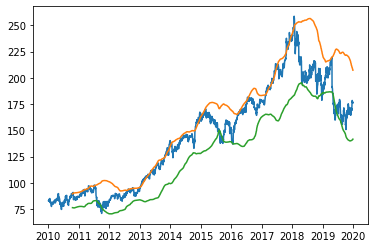

In [ ]:
plt.plot(df['MMM'])
plt.plot(df['MMM_bsuperior'])
plt.plot(df['MMM_binferior'])
plt.scatter(compras, range(len(df[ticker])), marker='^')
plt.scatter(vendas,range(len(df[ticker])),  marker='o')
